In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import plotly as py
from plotly.offline import iplot
import plotly.graph_objs as go
import numpy as np
import colorlover as cl
from IPython.display import HTML
import sympy as sp
py.offline.init_notebook_mode(connected=True)

In [2]:
def imshow(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_GRAY2RGB))

In [3]:
img_src=cv2.imread('test_img.bmp')
img_src=cv2.cvtColor(img_src,cv2.COLOR_BGR2RGB)

In [4]:
lx,ly,lz=img_src.shape
print(lx,ly,lz)
k1=min(lx,ly)//50
k2=k1//10
if k1 % 2 ==0:
    k1+=1
print(k1,k2)

5100 7020 3
103 10


In [5]:
print(lx//(lx//1600),ly//(ly//900))

1700 1002


In [6]:
img_src_zip=cv2.resize(img_src,(lx//(lx//1600),ly//(ly//900)),interpolation=cv2.INTER_AREA)
print(img_src_zip.shape)

(1002, 1700, 3)


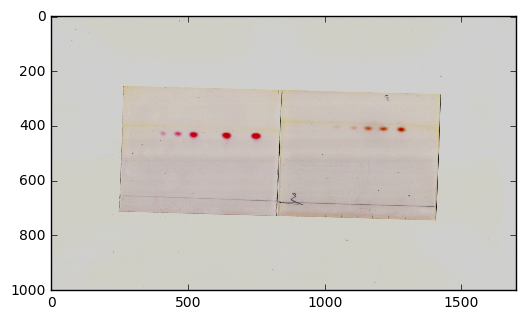

In [7]:
plt.imshow(img_src_zip)

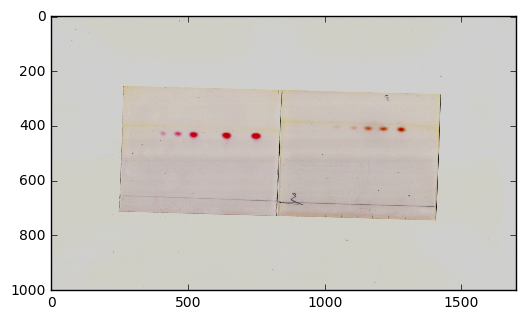

In [8]:
plt.imshow(img_src_zip)

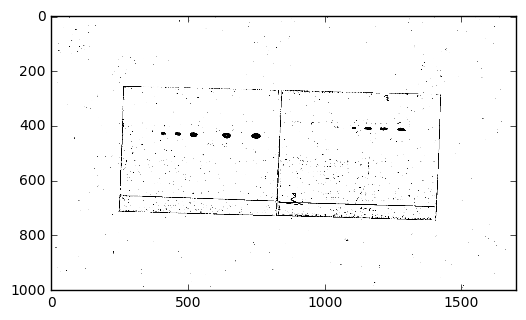

In [9]:
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))
# img=cv2.cvtColor(img_src_zip,cv2.COLOR_BGR2RGB)
# Извлекаем канал красного цвета
# img_gray=cv2.extractChannel(img_src_zip,2)
# imshow(img_gray)
img_gray=cv2.cvtColor(img_src_zip,cv2.COLOR_RGB2GRAY)
# _,img_gray=cv2.threshold(img_gray,250,255,cv2.THRESH_BINARY)
# Нормализуем изображение
img_gray=cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,27,5)
imshow(img_gray)
# Эрозия и дилитация
img_gray=cv2.morphologyEx(img_gray,cv2.MORPH_CLOSE,kernel)
# Готовим к отображению
img=cv2.cvtColor(img_gray,cv2.COLOR_GRAY2RGB)

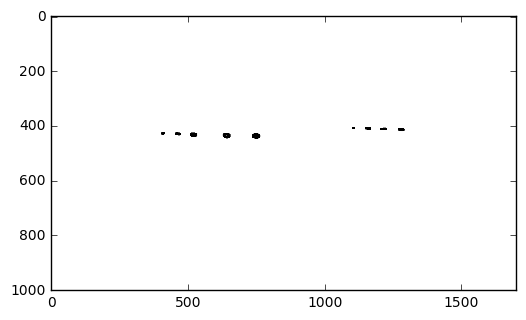

In [10]:
plt.imshow(img)

In [11]:
m2, contours, hierharchy=cv2.findContours(img_gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

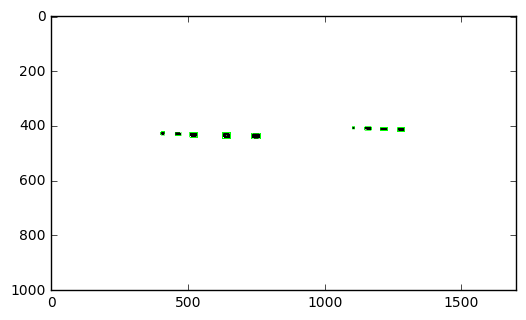

In [12]:
buf_img=img.copy()
cicles=[]
elements=[]
for cnt in contours[:-1]:
#     (x,y),radius=cv2.minEnclosingCircle(cnt)
#     x,y=int(x),int(y)
#     center=(x,y)
#     radius=int(radius)
#     cicles.append(img_gray[x-radius:x+radius,y-radius:y+radius])
#     img=cv2.circle(img,center,radius,(0,255,0),1)
    rect=cv2.minAreaRect(cnt)
    box=cv2.boxPoints(rect)
    box=np.int0(box)
    cv2.drawContours(buf_img,[box],0,(0,255,0),2)
    elements.append(box)
# draw=cv2.drawContours(buf_img, contours[:7], -1, (0,255,0), 3)
plt.imshow(buf_img)

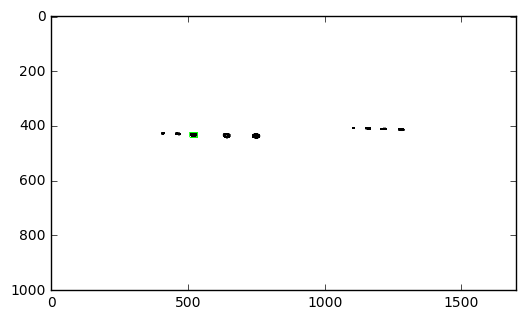

In [13]:
select_point=4
buf_img=img.copy()
cnt_buf=contours[select_point]
rect_buf=cv2.minAreaRect(cnt_buf)
box_buf=cv2.boxPoints(rect_buf)
box_buf=np.int0(box_buf)
cv2.drawContours(buf_img,[box_buf],0,(0,255,0),2)
plt.imshow(buf_img)

In [14]:
img_src_zip[314:326,215:225,2]

array([[207, 207, 207, 207, 207, 207, 207, 207, 207, 207],
       [202, 207, 206, 206, 206, 207, 207, 207, 207, 207],
       [204, 207, 207, 205, 207, 207, 207, 207, 206, 207],
       [206, 206, 206, 206, 207, 207, 207, 207, 202, 203],
       [205, 203, 206, 207, 207, 207, 207, 207, 206, 205],
       [204, 205, 207, 204, 207, 207, 207, 207, 207, 206],
       [206, 207, 207, 207, 206, 207, 207, 207, 204, 207],
       [207, 207, 207, 207, 207, 207, 207, 207, 206, 207],
       [207, 207, 207, 207, 207, 207, 207, 207, 206, 207],
       [207, 207, 207, 207, 207, 207, 207, 207, 206, 207],
       [207, 207, 207, 206, 207, 207, 207, 206, 206, 207],
       [207, 205, 207, 206, 206, 207, 207, 206, 205, 207]], dtype=uint8)

In [34]:
def cut_image(box):
    x,y=box.min(0)
    w,h=box.max(0)
    print(x,y,w,h)
    shift=max(h-x,w-y)//10
    x-=shift
    y-=shift
    h+=shift
    w+=shift
    buf=cv2.cvtColor(img_src_zip,cv2.COLOR_RGB2GRAY)[y:h,x:w]
#     buf=cv2.resize(buf,(50,50),interpolation=cv2.INTER_AREA)
#     buf=np.invert(buf)
    return buf
#     print(shift)
c = 299792458 # Скорость света
energy_RGB=np.array([442.5,565,650])*c
def area(img):
    f=np.vectorize(lambda rgb:np.log((rgb*energy_RGB).sum()))
    return f*img

In [20]:

box=elements[4]
x,y=box.min(0)
w,h=box.max(0)
print(x,y,w,h)
shift=max(h-x,w-y)//10
x-=shift
y-=shift
h+=shift
w+=shift
buf=cv2.cvtColor(img_src_zip,cv2.COLOR_RGB2GRAY)[y:h,x:w]
buf=cv2.resize(buf,(50,50),interpolation=cv2.INTER_AREA)
buf=np.invert(buf)
print(shift)

506 427 534 445
10


In [21]:
buf=buf-buf.min()

747 441 747 441


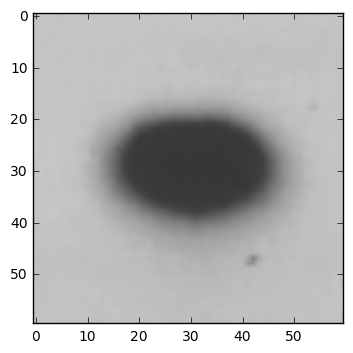

In [32]:
imshow(cut_image(elements[0]))

In [125]:
data=go.Surface(z=(buf))
layout=go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig=go.Figure(data=[data],layout=layout)
iplot(fig)

In [126]:
s=buf.sum(1)
data=go.Scatter(y=s)
iplot([data])

In [127]:
area=s.sum()

In [128]:
elements=np.array(elements)

In [129]:
areas=[]
for item in elements:
    cimg=cut_image(item)
    s=cimg.sum()
    areas.append(s)

747 441 747 441
640 439 640 439
731 430 764 451
625 428 655 450
506 427 534 445
452 426 474 439
400 425 415 437
1264 410 1290 424
1200 409 1227 420
1144 407 1168 419
1098 407 1108 415


In [130]:
concentration=[9,6]
k,b,x,y=sp.symbols('k,b,x,y')
f=sp.Eq(k*x+b,y)
sol=sp.solve([
        f.replace(y,concentration[0]).replace(x,areas[4]),
        f.replace(y,concentration[1]).replace(x,areas[3])])
func=lambda x:sol[k]*x+sol[b]


In [131]:
func(areas[1])

11.0230233803320

In [132]:
y=[float(func(x)) for x in areas]
data=go.Scatter(y=y,x=areas)
iplot([data])